In [144]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tabulate import tabulate

Cek data apa saja yang ada di dalam directory "./data

In [145]:
data_dir = './data'
print("Files in data directory:", os.listdir(data_dir))

Files in data directory: ['gender_submission.csv', 'test.csv', 'train.csv']


# 
# A. Data Preprocessing

In [146]:
df = pd.read_csv("./data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1. Cek value data yang kosong atau NULL

In [147]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2. Membersihkan data dari value yang kosong

In [148]:
# Isi data kosong pada Kolom Age dengan Median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Isi data kosong pada Kolom Embarked dengan Modus
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop kolom Cabin karena terlalu banyak yang kosong
df = df.drop('Cabin', axis=1)

# Cek Null Value setelah Data Cleaning
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [149]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#
# C. Exploratory Data Analysis (EDA)

1. Survived Analysis

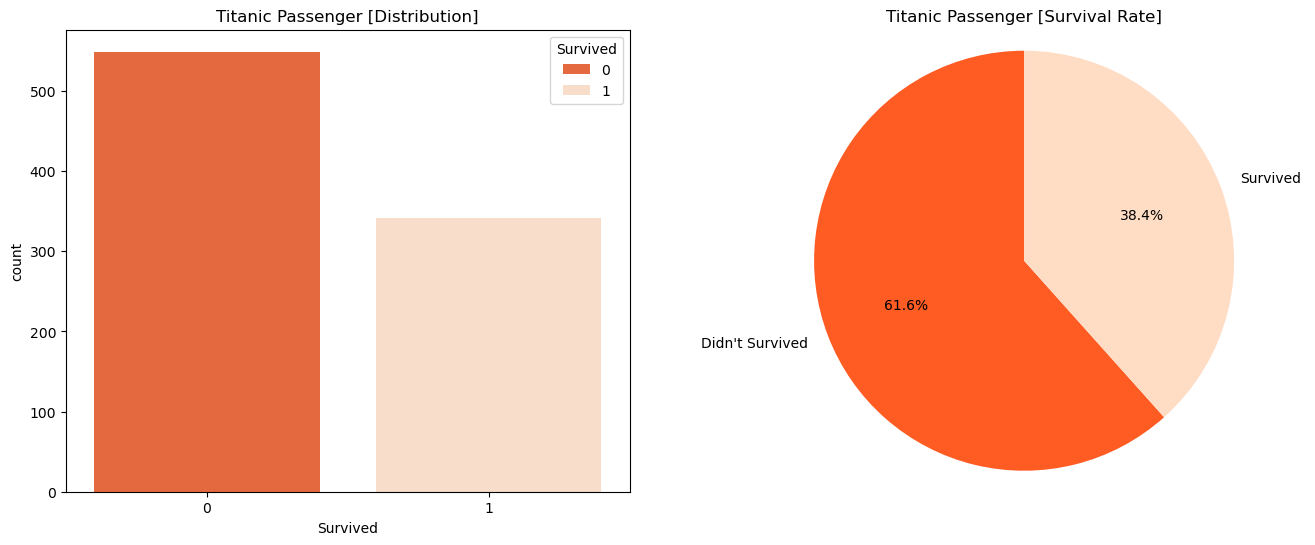

In [150]:
plt.figure(figsize=(16,6))
colors = ['#ff5c24', '#ffdcc4']
survival_counts = df['Survived'].value_counts()

plt.subplot(1,2,1)
sns.countplot(x='Survived', hue='Survived', data=df, palette=colors)
plt.title('Titanic Passenger [Distribution]')

plt.subplot(1,2,2)
labels = ["Didn't Survived", 'Survived']
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Titanic Passenger [Survival Rate]')
plt.axis('equal')

plt.show()

2. Passenger Class Analysis

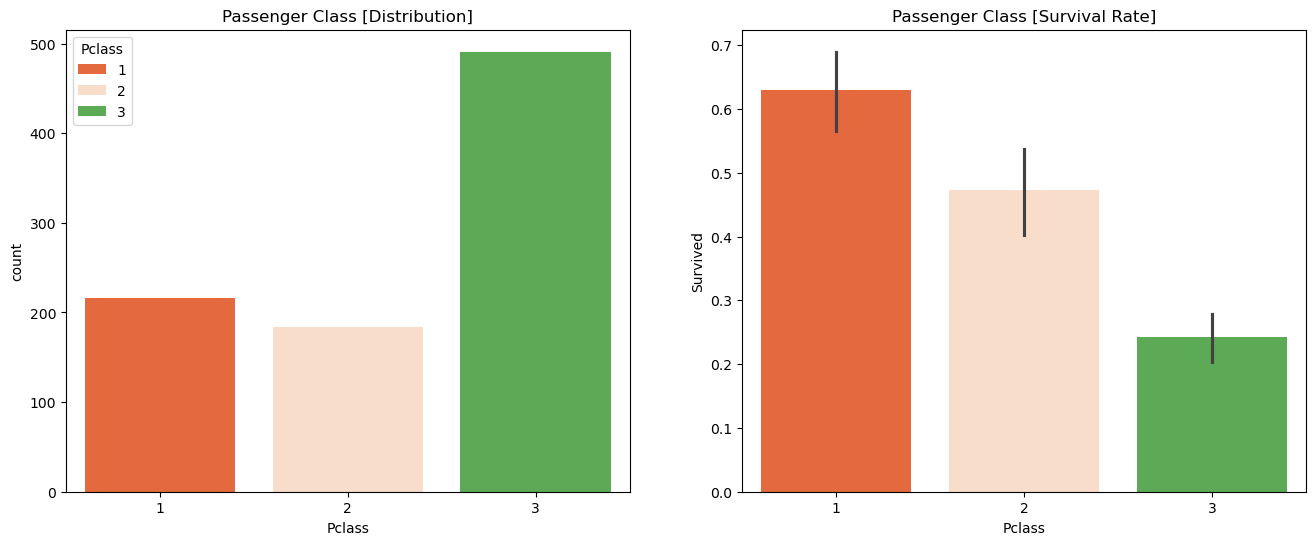

In [151]:
plt.figure(figsize=(16,6))
colors = ['#ff5c24', '#ffdcc4','#50b848']

plt.subplot(1,2,1)
sns.countplot(x='Pclass', hue='Pclass', data=df, palette=colors)
plt.title('Passenger Class [Distribution]')

plt.subplot(1,2,2)
sns.barplot(data=df, x='Pclass', y='Survived', hue='Pclass', palette=colors, legend=False)
plt.title('Passenger Class [Survival Rate]')
plt.show()

plt.show()

3. Gender Analysis

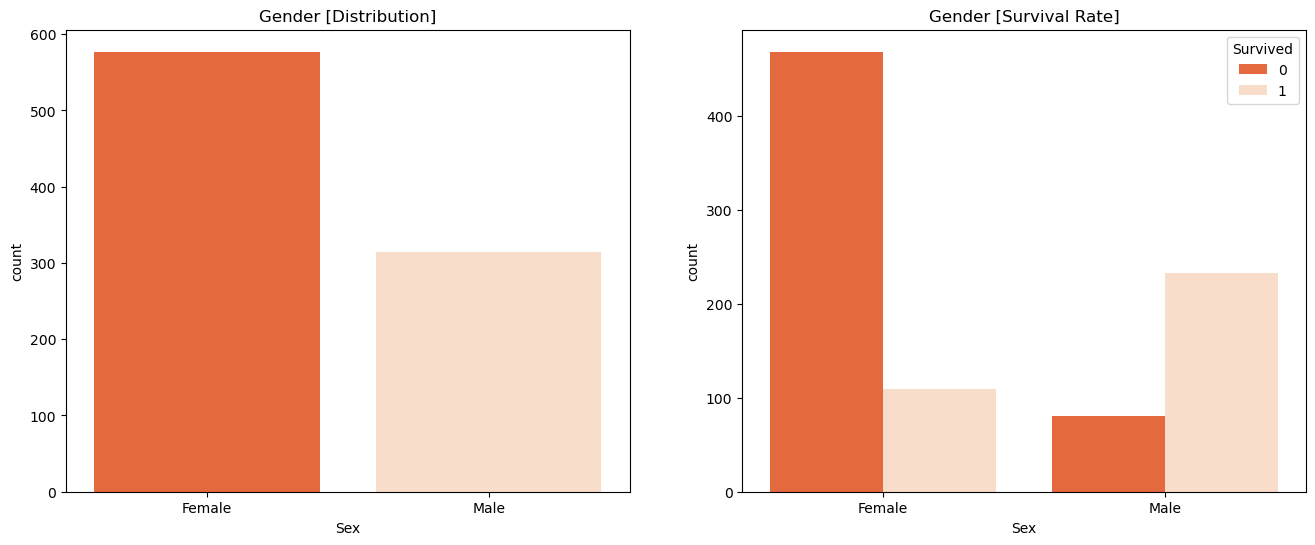

In [152]:
plt.figure(figsize=(16,6))
colors = ['#ff5c24', '#ffdcc4']


plt.subplot(1,2,1)
sns.countplot(x='Sex', hue='Sex', data=df, palette=colors)
plt.xticks(ticks=[1, 0], labels=['Male', 'Female'])
plt.title('Gender [Distribution]')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Sex', hue='Survived', palette=colors)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Gender [Survival Rate]')

plt.show()  

Age Analysis

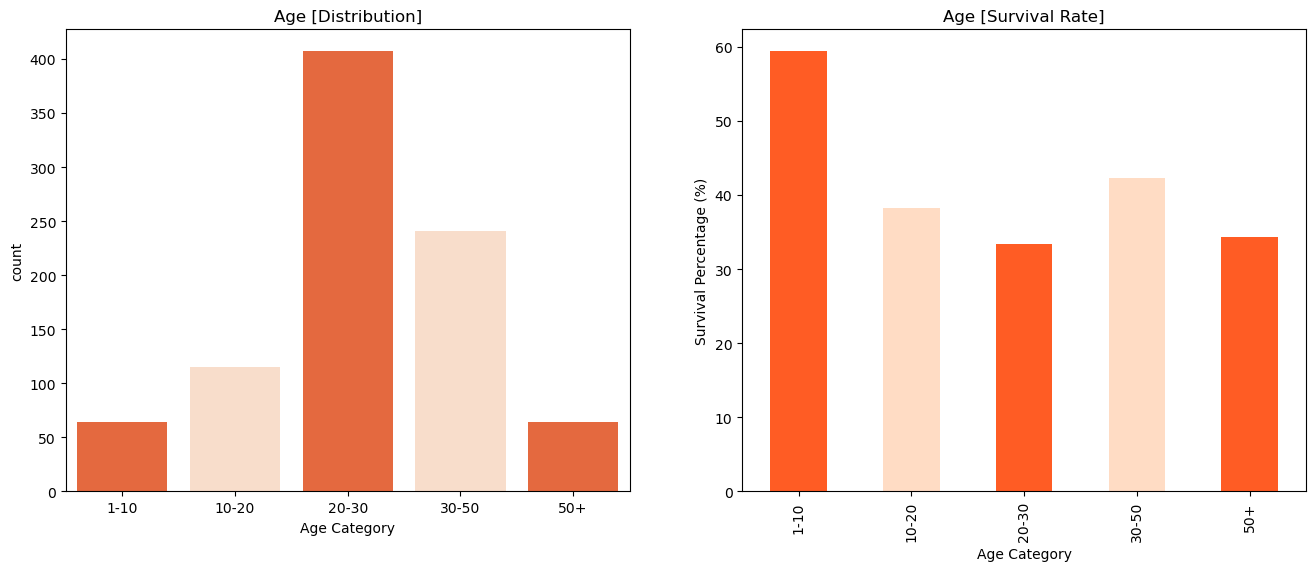

In [153]:
plt.figure(figsize=(16, 6))

# Create age categories for the dataset
age_bins = [0, 10, 20, 30, 50, 100]
age_labels = ['1-10', '10-20', '20-30', '30-50', '50+']
df['age_category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Plot 1: Distribution of Age Categories
plt.subplot(1,2,1)
colors = ['#ff5c24', '#ffdcc4','#ff5c24', '#ffdcc4','#ff5c24']
sns.countplot(x='age_category',hue='age_category', data=df, palette=colors)
plt.title('Age [Distribution]')
plt.xlabel('Age Category')


# Plot 2: Survival Percentage by Age Category
age_survival = df.groupby('age_category', observed=False)['Survived'].mean() * 100
plt.subplot(1,2,2)
colors = ['#ff5c24', '#ffdcc4']
age_survival.plot(kind='bar', color=colors)
plt.title('Age [Survival Rate]')
plt.xlabel('Age Category')
plt.ylabel('Survival Percentage (%)')


plt.show()

Fare Analysis

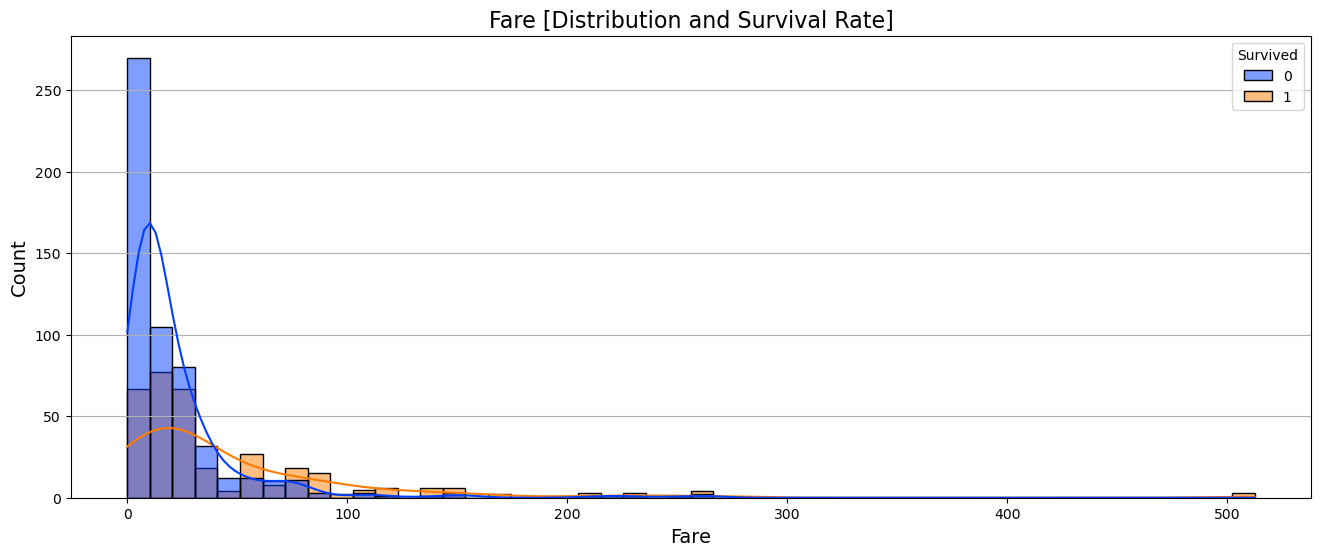

In [154]:
plt.figure(figsize=(16, 6))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True, bins=50, palette='bright')
plt.title('Fare [Distribution and Survival Rate]', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y')
plt.show()

# 
# D. Feature Engineer

1. Label Encoder untuk mengubah value Kategorik kolom Sex & Embarked, Menjadi Numerik

In [155]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,30-50
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,30-50
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,30-50


2. Menampilkan Correlation Matrix untuk menentukan Feature Collection

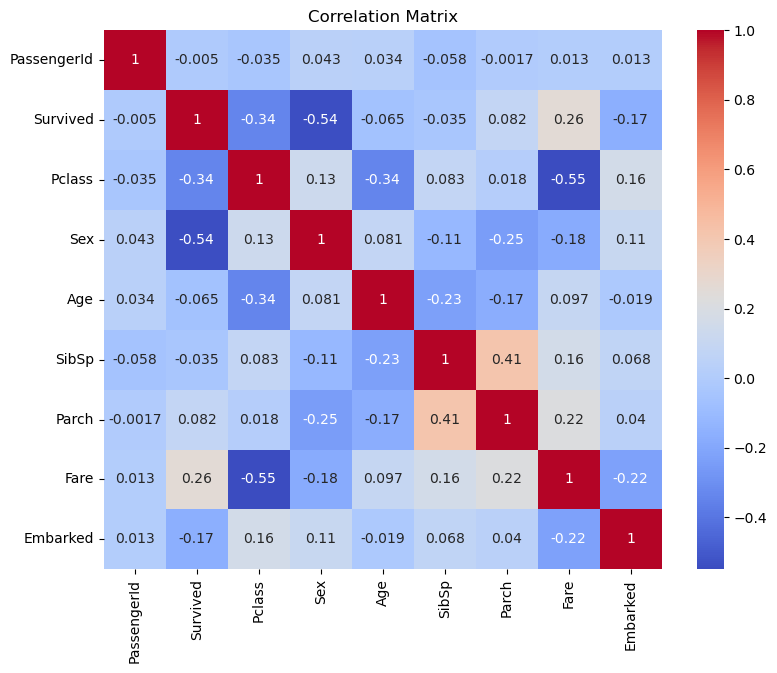

In [156]:
plt.figure(figsize=(9,7))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [157]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']
X = df[features]
y = df['Survived']

3. Menampilkan Data Train dan Data Test

In [158]:
print(X)
print('-' * 50)
print(y)

     Pclass  Sex   Age     Fare  SibSp  Parch
0         3    1  22.0   7.2500      1      0
1         1    0  38.0  71.2833      1      0
2         3    0  26.0   7.9250      0      0
3         1    0  35.0  53.1000      1      0
4         3    1  35.0   8.0500      0      0
..      ...  ...   ...      ...    ...    ...
886       2    1  27.0  13.0000      0      0
887       1    0  19.0  30.0000      0      0
888       3    0  28.0  23.4500      1      2
889       1    1  26.0  30.0000      0      0
890       3    1  32.0   7.7500      0      0

[891 rows x 6 columns]
--------------------------------------------------
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# 
# E. Train Test Split untuk memisahkan data latih dan data uji

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [160]:
X_train

,Pclass,Sex,Age,Fare,SibSp,Parch
140,3,0,28.0,15.2458,0,2
439,2,1,31.0,10.5000,0,0
817,2,1,31.0,37.0042,1,1
378,3,1,20.0,4.0125,0,0
491,3,1,21.0,7.2500,0,0
...,...,...,...,...,...,...
835,1,0,39.0,83.1583,1,1
192,3,0,19.0,7.8542,1,0
629,3,1,28.0,7.7333,0,0
559,3,0,36.0,17.4000,1,0


In [161]:
X_test

,Pclass,Sex,Age,Fare,SibSp,Parch
495,3,1,28.0,14.4583,0,0
648,3,1,28.0,7.5500,0,0
278,3,1,7.0,29.1250,4,1
31,1,0,28.0,146.5208,1,0
255,3,0,29.0,15.2458,0,2
...,...,...,...,...,...,...
780,3,0,13.0,7.2292,0,0
837,3,1,28.0,8.0500,0,0
215,1,0,31.0,113.2750,1,0
833,3,1,23.0,7.8542,0,0


In [162]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [163]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64

# 
# F. Modeling

Klasifikasi Data Train menggunakan model RandomForest

In [164]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=100, random_state=0)
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Klasifikasi Data Train menggunakan model SVM

In [165]:
from sklearn.svm import SVC

model_SVC = SVC(kernel='linear', random_state=0)
model_SVC.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Klasifikasi Data Train menggunakan Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(random_state=0)
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

Klasifikasi Data Train menggunakan XG Boost

In [167]:
import xgboost as xgb

model_XGB = xgb.XGBClassifier(n_estimators=100, random_state=0)
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

# 
# G. Evaluation

In [168]:
y_pred_RF = model_RF.predict(X_test)
y_pred_SVC = model_SVC.predict(X_test)
y_pred_XGB = model_XGB.predict(X_test)
y_pred_LR = model_LR.predict(X_test)

df_comparison = pd.DataFrame({
    'Actual Data': y_test,
    'RandomForest Prediction': y_pred_RF,
    'SVC Prediction': y_pred_SVC,
    'XG Boost Prediction': y_pred_XGB,
    'Logistic Regression Boost Prediction': y_pred_LR
})
df_comparison

,Actual Data,RandomForest Prediction,SVC Prediction,XG Boost Prediction,Logistic Regression Boost Prediction
495,0,0,0,0,0
648,0,0,0,0,0
278,0,0,0,0,0
31,1,1,1,1,1
255,1,0,1,0,1
...,...,...,...,...,...
780,1,1,1,1,1
837,0,0,0,0,0
215,1,1,1,1,1
833,0,0,0,0,0


In [169]:
# RandomForest Confusion Matrix
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
print("RF Confusion Matrix:")
print(conf_matrix_RF)

print("-" * 60)

# XG Boosting Confusion Matrix
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
print("XG Boosting Confusion Matrix:")
print(conf_matrix_XGB)

print("-" * 60)

# Logistic Regression Confusion Matrix
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_LR)

print("-" * 60)

# SVC Confusion Matrix
conf_matrix_SVC = confusion_matrix(y_test, y_pred_SVC)
print("SVC Confusion Matrix:")
print(conf_matrix_SVC)

RF Confusion Matrix:
[[99 11]
 [20 49]]
------------------------------------------------------------
XG Boosting Confusion Matrix:
[[98 12]
 [18 51]]
------------------------------------------------------------
Logistic Regression Confusion Matrix:
[[93 17]
 [17 52]]
------------------------------------------------------------
SVC Confusion Matrix:
[[92 18]
 [20 49]]


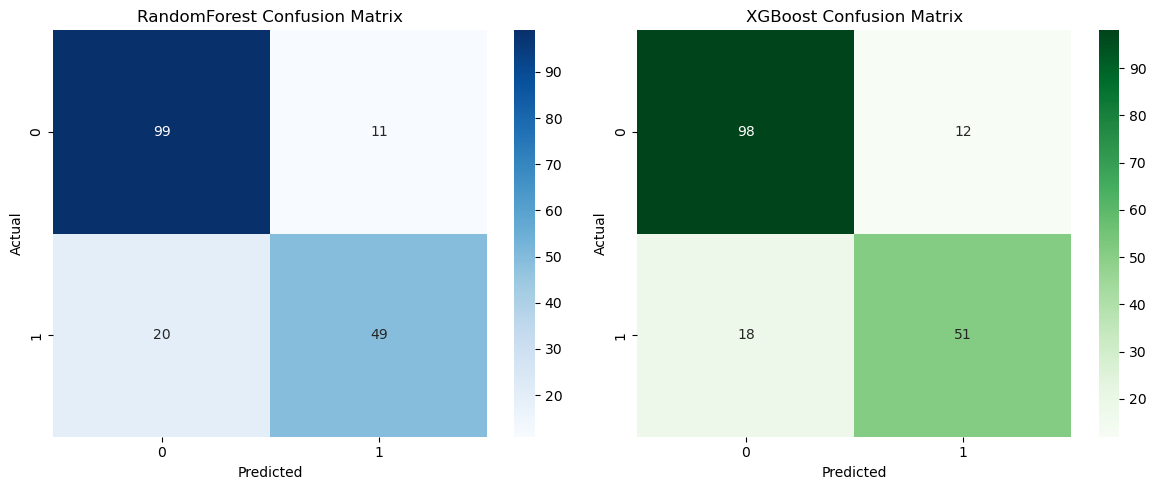

In [170]:
plt.figure(figsize=(12,5))

# Heatmap RandomForest
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Heatmap XG Boosting
plt.subplot(1,2,2)
sns.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='Greens')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

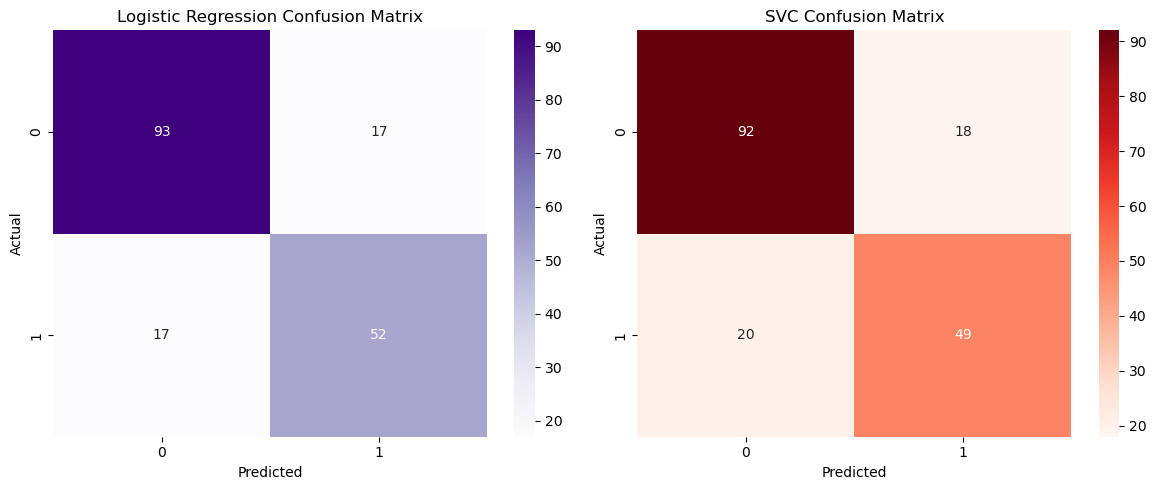

In [171]:
plt.figure(figsize=(12,5))

# Heatmap Logistic Regression
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Purples')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Heatmap SVC
plt.subplot(1,2,2)
sns.heatmap(conf_matrix_SVC, annot=True, fmt='d', cmap='Reds')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [172]:
# Menghasilkan laporan evaluasi untuk Random Forest
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_RF))
print("-" * 60)

# Menghasilkan laporan evaluasi untuk XG Boosting
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print("XG Boosting Classification Report:")
print(classification_report(y_test, y_pred_XGB))
print("-" * 60)

# Menghasilkan laporan evaluasi untuk Logistic Regression
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_LR))
print("-" * 60)

# Menghasilkan laporan evaluasi untuk SVC
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print("SVC Classification Report:")
print(classification_report(y_test, y_pred_SVC))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.82      0.71      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179

------------------------------------------------------------
XG Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

------------------------------------------------------------
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110


Perbandingan Evaluasi Akurasi Model

In [173]:
# Menyimpan hasil Model
performance = {
    'Accuracy': [accuracy_XGB, accuracy_RF, accuracy_LR, accuracy_SVC],
}

model_names = ["Random Forest Classifier", "XG Boosting Classifier", "Logistic Regression Classifier" , "SVC Classifier"]


Result

+--------------------------------+------------+
|                                |   Accuracy |
|--------------------------------+------------|
| Random Forest Classifier       |   0.832402 |
| XG Boosting Classifier         |   0.826816 |
| Logistic Regression Classifier |   0.810056 |
| SVC Classifier                 |   0.787709 |
+--------------------------------+------------+



C:\Users\Acer\AppData\Local\Temp\ipykernel_14092\2462605273.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df['Accuracy'], y=performance_df.index,  palette=['#88BCDC', '#90CC84', '#B0A4CC', '#FF8464'])


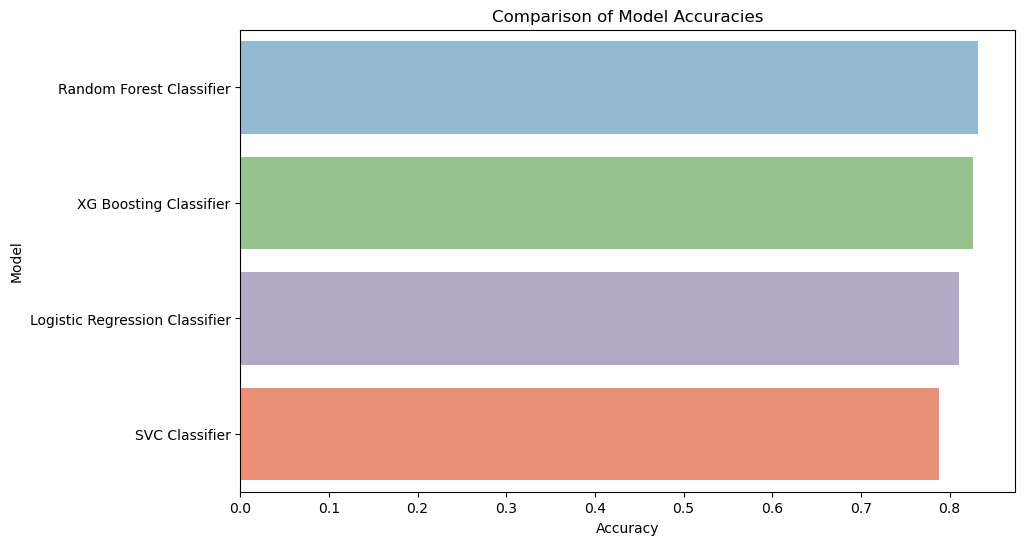

In [174]:
performance_df = pd.DataFrame(performance, columns=['Accuracy'], index=model_names)

# Print Hasil Akurasi tiap model
print(f'\nResult\n')
print(tabulate(performance_df, headers='keys', tablefmt='psql'))
print()

# Bar plot untuk akurasi pada tiap model
plt.figure(figsize=(10, 6))
sns.barplot(x=performance_df['Accuracy'], y=performance_df.index,  palette=['#88BCDC', '#90CC84', '#B0A4CC', '#FF8464'])
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Comparison of Model Accuracies')
plt.show()

# 
# H. Melihat data yang paling berpengaruh dalam prediksi

In [175]:
feature_importance = model_RF.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
3,Fare,0.293008
1,Sex,0.275993
2,Age,0.267444
0,Pclass,0.077386
4,SibSp,0.049024
5,Parch,0.037145
